In [1]:
from skimage import measure
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

%matplotlib inline

In [2]:
def get_CCA_from_image(image, threshold = 115, show_image=False):
    img = cv2.imread(image,0)
    h,w = img.shape[:2]

    # plt.show()
    if show_image:
        fig,ax = plt.subplots(1)
    # ax.imshow(img,cmap='gray')

    L = measure.label(img)
    # print "Number of components:", np.max(L)
    # print L

    ret, thresh = cv2.threshold(img,threshold,255,cv2.THRESH_BINARY)
    
    output = cv2.connectedComponentsWithStats(thresh, 8, cv2.CV_32S)

    # Get the results
    # The first cell is the number of labels
    num_labels = output[0]
    # The second cell is the label matrix
    labels = output[1]
    # The third cell is the stat matrix
    stats = output[2]
    # The fourth cell is the centroid matrix
    centroids = output[3]

#     print num_labels
#     print labels, len(labels)
#     print stats
#     print centroids

    # cv2.imshow('image',img)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()
    # put a red dot, size 40, at 2 locations:
    # plt.scatter(x=[centroids[0][0], centroids[1][0]], y=[centroids[0][1], centroids[1][1]], c='r', s=40)
    # ax2 = plt.add_subplot(111, aspect='equal')
    max_area_index=-1
    for i in range(len(stats)):
        if stats[i][0]==0 and stats[i][1]==0:
            continue
        if show_image:
            ax.add_patch(
                patches.Rectangle(
                    (stats[i][0], stats[i][1]),
                    stats[i][2],
                    stats[i][3],
                    fill=False,      # remove background
                    color='red'
                )
            )
        if max_area_index==-1:
            max_area_index=i
        elif stats[i][4] > stats[max_area_index][4]:
            max_area_index=i
            
    # fig2.savefig('rect2.png', dpi=90, bbox_inches='tight')
    if show_image:
        ax.imshow(thresh, cmap='gray')
        plt.show()
    #crop
    chosen_box = thresh[stats[max_area_index][1]:stats[max_area_index][1]+stats[max_area_index][3],stats[max_area_index][0]:stats[max_area_index][0]+stats[max_area_index][2]]
    return stats[max_area_index], chosen_box


In [3]:
def get_ratio_of_image(img):
    #ratio of white to black
    a=cv2.countNonZero(img)
    h,w = img.shape[:2]
#     print type(float(a))
#     print (float(h)*float(w))
    return float(float(a)/(float(h)*float(w)))

In [57]:
def get_best_threshold(img_filename, start=30, max_steps =50, alpha=1):
    min_ratio = float("inf")
    index = -1
    final_chosen_box = None
    final_stats = []
    thresholds = np.arange(start,start+max_steps,alpha)
    for i in thresholds:
        stats, chosen_box = get_CCA_from_image(img_filename, i, show_image=False)
        ratio = get_ratio_of_image(chosen_box)
        if ratio < min_ratio:
            min_ratio = ratio
            index = i
            final_chosen_box = chosen_box
            final_stats = stats
    return index, final_chosen_box, final_stats

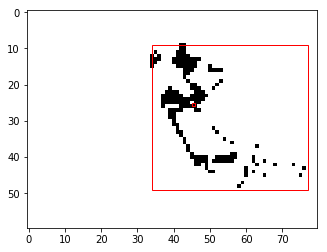

(array([ 34,   9,  43,  40, 179], dtype=int32),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255,   0, 255, ..., 255, 255, 255],
        ..., 
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8))

In [56]:
# index, chosen_box, stats = get_best_threshold('dataset-2/rgb67.jpg')
get_CCA_from_image('dataset-2/rgb67.jpg', 30, show_image=True)
# plt.imshow(chosen_box, cmap="gray")
# plt.show()

In [6]:
def get_chosen_box_and_stats(img_filename, threshold):
    stats, chosen_box = get_CCA_from_image(img_filename, threshold, show_image=False)
    return chosen_box, stats

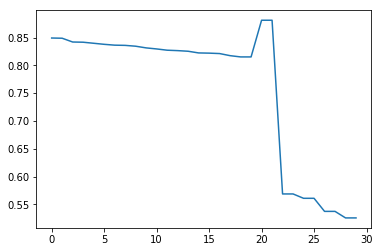

In [7]:
ratios = []
for i in np.arange(80,110,1):
    stats, chosen_box = get_CCA_from_image('dataset-1/rgb40.jpg', i, show_image=False)
    ratios.append(get_ratio_of_image(chosen_box))
plt.plot(ratios)

In [62]:
# test_images = [('dataset-2/rgb66.jpg', 91),'dataset-2/rgb67.jpg',('dataset-2/rgb69.jpg', 80),
#               ('dataset-4/rgb8.jpg', 40), ('dataset-4/rgb9.jpg', 40), ('dataset-4/rgb10.jpg', 60),
#               ('dataset-4/rgb26.jpg', 60),
#               ('dataset-5/rgb72.jpg', 72),('dataset-5/rgb73.jpg', 73),('dataset-5/rgb74.jpg', 74)]
# # overriding
classifier_map = {
    '5': 'standing',
    '1': 'lyding down',
    '2': 'lyding down',
    '4': 'sitting',
    '7': 'sitting'
}

import os
test_images = []
for root, dirnames, filenames in os.walk('dataset-2'):
    for filename in filenames:
        if filename.endswith('jpg'):
            test_images.append(root+'/'+filename)
print test_images

['dataset-2/rgb58.jpg', 'dataset-2/rgb64.jpg', 'dataset-2/rgb70.jpg', 'dataset-2/rgb71.jpg', 'dataset-2/rgb65.jpg', 'dataset-2/rgb59.jpg', 'dataset-2/rgb73.jpg', 'dataset-2/rgb67.jpg', 'dataset-2/rgb66.jpg', 'dataset-2/rgb72.jpg', 'dataset-2/rgb76.jpg', 'dataset-2/rgb62.jpg', 'dataset-2/rgb89.jpg', 'dataset-2/rgb88.jpg', 'dataset-2/rgb63.jpg', 'dataset-2/rgb77.jpg', 'dataset-2/rgb61.jpg', 'dataset-2/rgb75.jpg', 'dataset-2/rgb74.jpg', 'dataset-2/rgb60.jpg', 'dataset-2/rgb79.jpg', 'dataset-2/rgb86.jpg', 'dataset-2/rgb92.jpg', 'dataset-2/rgb87.jpg', 'dataset-2/rgb78.jpg', 'dataset-2/rgb91.jpg', 'dataset-2/rgb85.jpg', 'dataset-2/rgb84.jpg', 'dataset-2/rgb90.jpg', 'dataset-2/rgb53.jpg', 'dataset-2/rgb57.jpg', 'dataset-2/rgb80.jpg', 'dataset-2/rgb81.jpg', 'dataset-2/rgb56.jpg', 'dataset-2/rgb54.jpg', 'dataset-2/rgb68.jpg', 'dataset-2/rgb83.jpg', 'dataset-2/rgb82.jpg', 'dataset-2/rgb69.jpg', 'dataset-2/rgb55.jpg']


In [8]:
def get_original_image_cropped(image, stats):
    return image[stats[1]:stats[1]+stats[3],stats[0]:stats[0]+stats[2]]

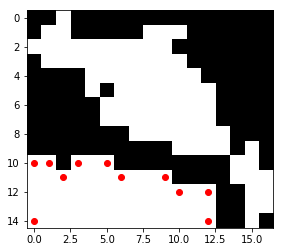

In [9]:
image, contours, hierarchy = cv2.findContours(chosen_box, cv2.RETR_EXTERNAL ,cv2.CHAIN_APPROX_SIMPLE)
x=[]
y=[]
# print contours
for i in contours[0]:
    x.append(i[0][0])
    y.append(i[0][1])
    plt.imshow(image,cmap='gray')
plt.plot(x, y, 'ro')
plt.show()

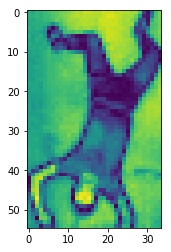

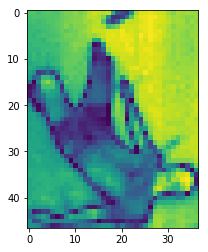

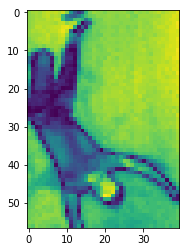

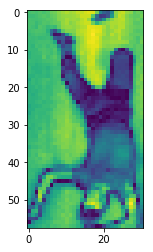

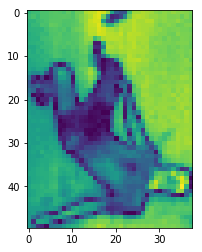

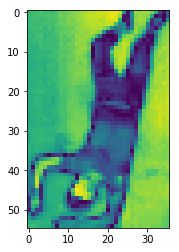

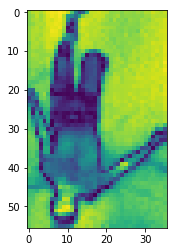

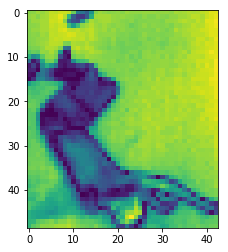

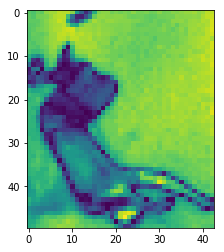

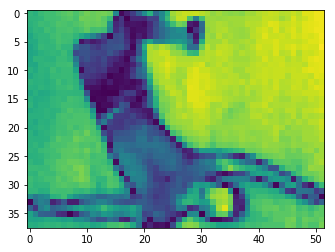

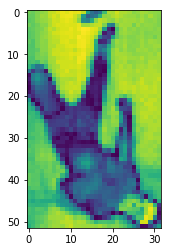

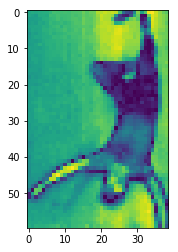

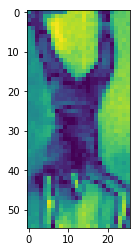

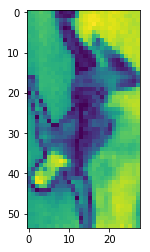

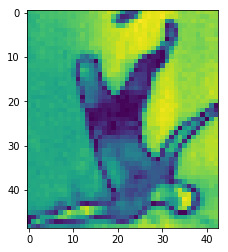

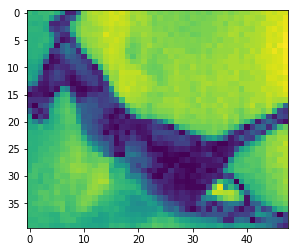

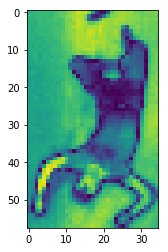

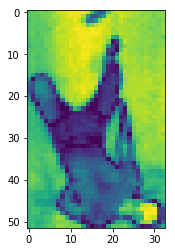

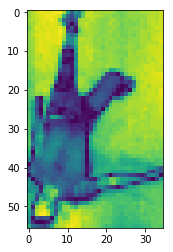

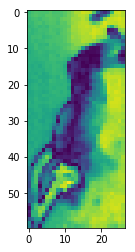

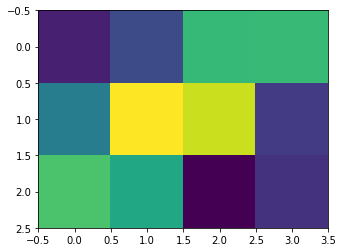

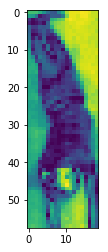

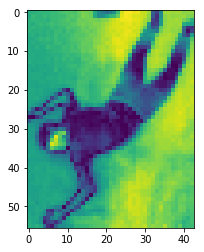

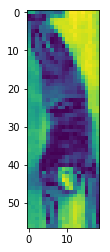

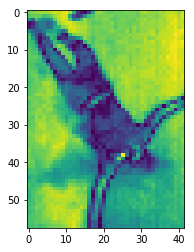

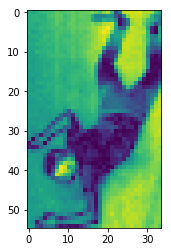

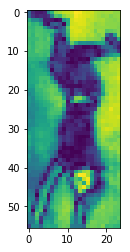

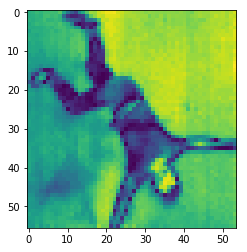

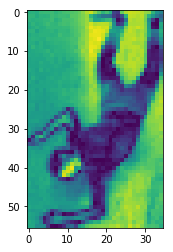

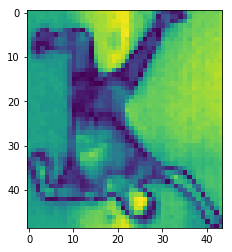

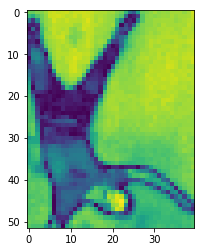

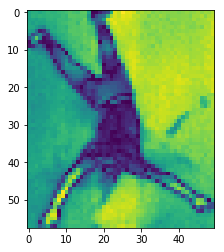

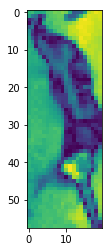

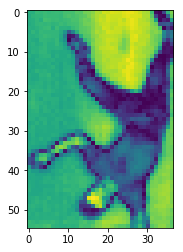

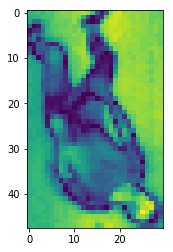

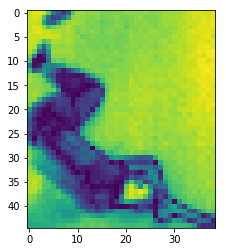

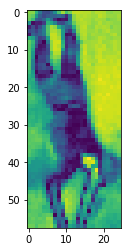

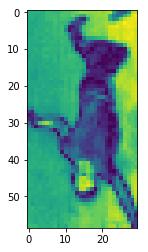

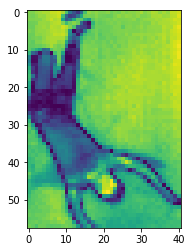

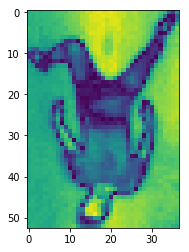

[-2.969022759318493e-23, -1.0292287525667079e-21, -1.1035938383115187e-21, 9.9941156171473728e-22, -1.3269194244541061e-21, -2.5450534267386068e-24, -1.0721282471961118e-21, -4.9157825526920999e-22, -5.5405674300413297e-22, 2.2218088874543241e-21, -3.4609947621868664e-22, 1.5355596503313222e-22, -6.5926939309979458e-21, 2.373561488468563e-23, -1.020478999581493e-22, 5.8086484681709464e-22, 3.5297939168167992e-23, 6.0223258742214279e-22, -2.0994783534280657e-21, 7.7119991102922492e-25, -8.4345829371041154e-22, -8.7105543006364759e-20, 3.213253233011331e-24, -8.7461441878284508e-20, -1.611172985569853e-23, -1.2857485734783515e-21, -5.3913894479997747e-23, 6.2476002701696526e-23, -1.2798555539338587e-21, -3.0781464870886213e-24, -7.461336558937339e-22, 5.4751465535168641e-23, -8.7044508467785667e-21, -2.6726025093797979e-22, -8.2167427607720399e-22, -9.2830892469789172e-22, -2.6238477147018426e-21, 1.1813763108901098e-24, -7.4796819113264211e-22, -9.2593698915111858e-24]


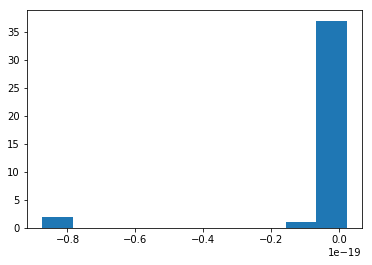

In [63]:
#### boxes = []
moments = []
use_original_images = True

results = []

for i in test_images:
    if type(i) == tuple:
        filename = i[0]
        chosen_box, stats  = get_chosen_box_and_stats(i[0],i[1])
    else:
        filename = i
        try:
            threshold, chosen_box, stats = get_best_threshold(i)
        except:
            continue
    if use_original_images:
        chosen_box_thermal = get_original_image_cropped(cv2.imread(filename,0), stats)
        boxes.append(chosen_box_thermal)
         
        plt.imshow(chosen_box_thermal)
        plt.show()
        
        temp_moments = cv2.moments(chosen_box_thermal)
        #results.append(cv2.HuMoments(temp_moments))
        
        zz = []
        for _z in cv2.HuMoments(temp_moments):
            zz.append(_z[0])
        results.append(zz)
    else:
        boxes.append(chosen_box)
        plt.imshow(chosen_box)
        plt.show()

# for j in boxes:
#     moments.append(cv2.moments(j))
# for l in moments:
#     print cv2.HuMoments(l)

# 7 of Hu's tings
hu_1 = []
hu_2 = []
hu_3 = []
hu_4 = []
hu_5 = []
hu_6 = []
hu_7 = []

for a_result in results:
    hu_1.append(a_result[0])
    hu_2.append(a_result[1])
    hu_3.append(a_result[2])
    hu_4.append(a_result[3])
    hu_5.append(a_result[4])
    hu_6.append(a_result[5])
    hu_7.append(a_result[6])

#print sum(hu_1)/len(hu_1), sum(hu_2)/len(hu_2), sum(hu_3)/len(hu_3), sum(hu_4)/len(hu_4), sum(hu_5)/len(hu_5), sum(hu_6)/len(hu_6), sum(hu_7)/len(hu_7)

#print hu_5
#print hu_7
print hu_7
plt.hist(hu_7)
plt.show()

In [11]:
import numpy
# proccesing all of them now

# load data
sitting_data = numpy.load('dataset/sitting.npy')
standing_data = numpy.load('dataset/standing.npy')
lying_data = numpy.load('dataset/lying.npy')
# print sitting_data, standing_data, lying_data